# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [281]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as sp
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')
sns.set()

## Q1: Check for Normality of Body Temperatures

We'll do this in a few graphical and statistical methods:
1. Histogram of Frequencies
2. CDF Plot
3. Quantile-Quantile (QQ) Plot
4. Shapiro Wilk Test
5. D’Agostino’s K^2 Test

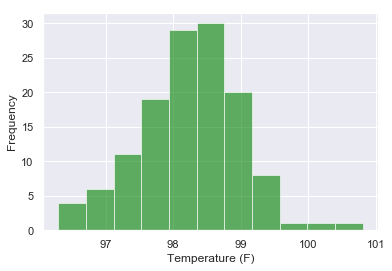

In [282]:
# Method 1: Histogram of frequencies
plt.hist(df.temperature, bins=11, color='green', alpha=0.6)

# Label and display
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.show()

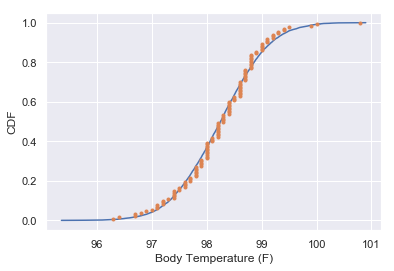

In [283]:
# Method 2: CDF of actual / theoretical data

# Generate theoretical data for normal distribution
mean = np.mean(df.temperature)
std = np.std(df.temperature)
normal_samples = np.random.normal(mean, std, size=10000)

# Plot CDF of theoretical data
x = np.sort(normal_samples)
y = np.arange(1, len(normal_samples) + 1) / len(normal_samples)
plt.plot(x, y)

# Overlay CDF of actual data
x = np.sort(df.temperature)
y = np.arange(1, len(df.temperature) + 1) / len(df.temperature)
plt.plot(x, y, marker='.', linestyle='none')

# Label and display
plt.xlabel('Body Temperature (F)')
plt.ylabel('CDF')
plt.show()

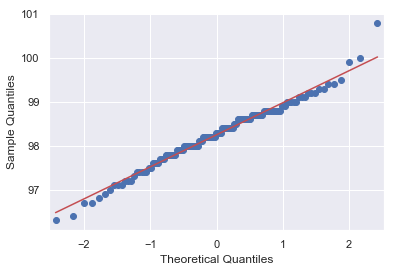

In [284]:
# Method 3: QQ Plot
sm.qqplot(df.temperature, line='s')
plt.show()

Visually, the data is close to `Normal`, though we have a few extreme points at either end of the data.

That's not a problem though since we'll be using the `Central Limit Theorem` and we satisfy its requirements.

Now, let's do two quantitative tests for normality...

In [285]:
# Method 4: Shapiro Wilk Test
w, p = sp.shapiro(df.temperature)
print('W: ', w, 'P-value: ', p)

W:  0.9865770936012268 P-value:  0.233174666762352


In [286]:
# Method 5: D’Agostino’s K^2 Test
stat, p = sp.normaltest(df.temperature)
print('Stat: ', stat, 'P-value: ', p)

Stat:  2.703801433319203 P-value:  0.2587479863488254


Both tests above yield a `p-value that is close to 0.25`, so we can feel comfortable that the data is normal.

Again, since we'll be applying the `Central Limit Theorem`, this is not an issue either way.

## Q2: Independence and Sample Size

1. Our sample size is `130 >= 30`, so according to the Central Limit Theorem, we are good to go.
2. We can assume indpendence since `130 is much smaller than the entire population` of human beings.

## Q3: True Population Mean

We want to check if the true population mean is `98.6` degrees F. This is a two tailed test, which we will perform in two ways.

`H0: Mu = 98.6`

`Ha: Mu != 98.6`

`α = 0.05`

### 1. Bootstrap Hypothesis Test

In [287]:
# Generate 10000 bootstrap replicates of Temperature mean
mu = 98.6
bootstrap_samples = np.empty(10000)
for i in range(10000) :
    temperature_samples = np.random.choice(df.temperature, size=len(df.temperature))
    bootstrap_samples[i] = np.mean(temperature_samples)

# Calculate P-Value
np.sum(bootstrap_samples >= mu) / len(bootstrap_samples)

0.0

Our initial test indicates that `98.6` is NOT the true population mean. None of the 10000 sample means were as extreme as `98.6` degrees F
### 2. One-Sample Z and T Tests

In [288]:
# Perform one-sample z test

# Calculate z statistic
x_bar = np.mean(df.temperature)
sigma = np.std(df.temperature)
mu = 98.6
n = len(df.temperature)
z_stat = (x_bar - mu) / (sigma / np.sqrt(n))

# Ensure z_stat is negative so we can use norm.cdf() below
if z_stat > 0:
    z_stat *= -1

# Calculate p-value. Two tailed test.
p_value = sp.norm.cdf(z_stat) * 2

# Print Z stat and p-value
print('z-stat: ', z_stat)
print('p_value: ', p_value)

z-stat:  -5.475925202078116
p_value:  4.3523151658821886e-08


In [289]:
# Perform one-sample t test

# Compute t_stat and p-value
t_stat, p_value = sp.ttest_1samp(df.temperature, 98.6)
print('t-stat: ', t_stat)
print('p_value: ', p_value)

t-stat:  -5.4548232923645195
p_value:  2.4106320415561276e-07


Since our sample size is >= 30, we should use the `z test`, but since `n` is quite large, the `z-test` and `t-test` should yield similar `p-values`.

In both cases, we got a `p-value that is way below 0.05` (almost zero), so `we will reject the null hypothesis`. This result matches the  bootstrap hypothesis test from above.

## Q4: Repeat Hypothesis Tests With Smaller N

What happens if we reduce the sample size `N` from `130` to `10`? Again, we have:

`H0: Mu = 98.6`

`Ha: Mu != 98.6`

`α = 0.05`

### 1. Bootstrap Hypothesis Test

In [290]:
# Generate 10000 bootstrap replicates of Temperature mean
mu = 98.6
bootstrap_samples = np.empty(10000)
for i in range(10000) :
    temperature_samples = np.random.choice(df.temperature, size=10)
    bootstrap_samples[i] = np.mean(temperature_samples)
    
# Calculate P-Value
np.sum(bootstrap_samples >= mu) / len(bootstrap_samples)

0.0627

Decreasing `N` decreases the `power` of the experiment, which increases the chance of committing a `Type II Error`: accepting `H0` when it is false.
### 2. One Sample Z and T Tests

In [291]:
# Perform one-sample z test

# Generate random sample of 10 temperature measurements
sample_ten = np.random.choice(df.temperature, size=10)

# Calculate z statistic
x_bar = np.mean(sample_ten)
sigma = np.std(sample_ten)
mu = 98.6
N = 10
z_stat = (x_bar - mu) / (sigma / np.sqrt(N))

# Ensure z_stat is negative so we can use norm.cdf() below
if z_stat > 0:
    z_stat *= -1

# Calculate p-value. Two tailed test.
p_value = sp.norm.cdf(z_stat) * 2

# Print Z stat and p-value
print('z-stat: ', z_stat)
print('p_value: ', p_value)

z-stat:  -0.5662519603189553
p_value:  0.5712225122835453


In [292]:
# Perform one-sample t test

# Compute t_stat and p-valuet_stat, p_value = sp.ttest_1samp(sample_ten, 98.6)
print('t-stat: ', t_stat)
print('p_value: ', p_value)

t-stat:  -5.4548232923645195
p_value:  0.5712225122835453


Again, we notice how a smaller `N` can affect the `power` of the experiment. Re-running the code snippets above produces a wide range of `statistics` and `p-values` which is why we should aim to increase our sample size `N` when possible.

## Q5: Abnormal Temperatures

When should we conssider someone's temperature to be abnormal?

A general rule of thumb, is when it lies beyond `2 standard deviations` of the `population mean`.

Again, we will calculate this in two ways:
### 1. Bootstrap Approach

In [293]:
# Generate 10000 bootstrap replicates of Temperature mean
mu = 98.6
bootstrap_samples = np.empty(10000)
for i in range(10000) :
    temperature_samples = np.random.choice(df.temperature, size=len(df.temperature))
    bootstrap_samples[i] = np.mean(temperature_samples)

# Calculate 95% confidence interval    
low, high = np.percentile(bootstrap_samples, [2.5, 97.5])
print('95% Confidence Interval: [', low, ',', high, ']')

95% Confidence Interval: [ 98.12459615384614 , 98.3776923076923 ]


### 2. Frequentist Approach

In [294]:
# Critical value for 2 standard deviations
t_critical = 1.96

# Compute standard error
sigma = np.std(df.temperature)
x_bar = np.mean(df.temperature)
n = len(df.temperature)
SE = sigma / np.sqrt(n)

# Compute margin of error
margin = 1.96 * SE

# Display 95% confidence interval
print('95% Confidence Interval: [', x_bar - margin, ',', x_bar + margin, ']')

95% Confidence Interval: [ 98.12367980442819 , 98.37478173403336 ]


Both methods yeild almost the same confidence intervals. Based on the data, an abnormal temperature lies outside the range `[98.12, 98.38]`. Note that the empirical value of `98.6 F` is outside this interval and is considered abnormal.

## Q6. Difference Between Male and Female Temperatures

Suppose we ask: is there a significant difference between male and female body temperatures?

`H0: Mu1 - Mu2 = 0`

`Ha: Mu1 - Mu2 != 0`

`α = 0.05`

Here, `Mu1` and `Mu2` represent `female` and `male` `mean body temperatures` respectively.

### 1. Permutation Approach

In [295]:
# Store male, female, and all temps
male_temps = df[df.gender == 'M'].temperature
female_temps = df[df.gender == 'F'].temperature
temps = df.temperature.values

# Calculate mean difference between male and female temps
mean_diff = np.mean(female_temps) - np.mean(male_temps)
print('Mean difference between male and female temperatures:', mean_diff)

Mean difference between male and female temperatures: 0.289230769230727


In [296]:
# Create 10000 permutations of temperatures, each time assigning first half as male
# and second half as female. Then, calculate mean difference between both.
mean_diffs = np.empty(10000)
for i in range(10000) :
    temps_perm = np.random.permutation(temps)
    male_perm_temps = temps_perm[:65]
    female_perm_temps = temps_perm[65:]
    mean_diffs[i] = np.mean(female_perm_temps) - np.mean(male_perm_temps)
    
# Calculate p-value. Two tailed test.
print('p-value:', np.sum((mean_diffs >= mean_diff) + (mean_diffs <= -mean_diff)) / len(mean_diffs))

p-value: 0.0229


### 2. Two Sample Z Test Approach

In [297]:
# Compute means of male and female samples
x_bar_male = np.mean(male_temps)
x_bar_female = np.mean(female_temps)

# Compute num of male and female samples
num_male = len(male_temps)
num_female = len(female_temps)

# Compute std of male and female samples
male_std = np.std(male_temps)
female_std = np.std(female_temps)

# Calculate z_stat
female_minus_male_std = np.sqrt( ((male_std ** 2) / num_male) + ((female_std ** 2) / num_female) )
z_stat = (x_bar_female - x_bar_male) / female_minus_male_std

# Calculate p-value. Two tailed test
# Use negative z_stat for cdf.
p_value = sp.norm.cdf(-z_stat) * 2 

# Print Z stat and p-value
print('z-stat: ', z_stat)
print('p_value: ', p_value)

z-stat:  2.3032202891940123
p_value:  0.02126645183012935


Both methods yield a `p-value between 0.02 and 0.03`. With `α = 0.05`, `we reject the null hypothesis` and conclude that `there is a significant difference between male and female body temperatures`.